# Understanding Descriptive Statistics

Import the necessary libraries here:

In [12]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [13]:
def game_dice():
    data = np.random.randint(1,6,size = 10)
    return data 

numbers =game_dice()
numbers

array([1, 5, 2, 5, 5, 4, 2, 2, 1, 2])

#### 2.- Plot the results sorted by value.

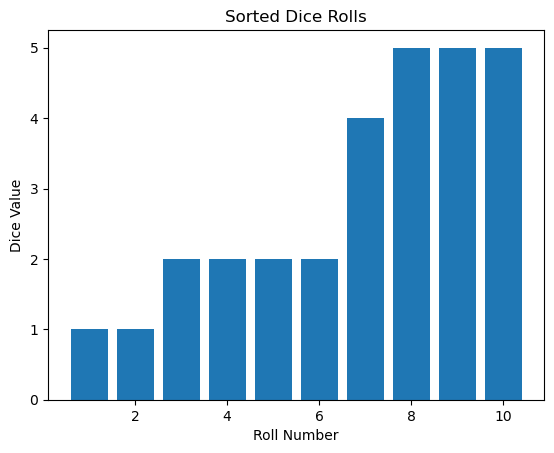

In [19]:
sorted_numbers = np.sort(numbers)

plt.bar(np.arange(1, 11), sorted_numbers)

plt.xlabel('Roll Number')
plt.ylabel('Dice Value')
plt.title('Sorted Dice Rolls')

plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

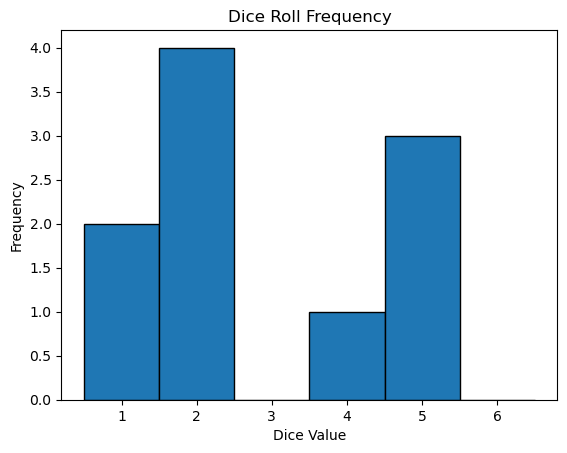

In [18]:
plt.hist(numbers, bins=np.arange(0.5, 7.5, 1), edgecolor='black')

# Set labels and title
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Dice Roll Frequency')

# Show the plot
plt.show()

In [ ]:
#I dont see any relation between them except that they are both related to the same 10 rolls of a dice

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [20]:
mean = numbers.sum()/len(numbers)
mean


2.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [21]:
def mean(numbers):
    numbers_frequency = {}
    for value in numbers:
        if value in numbers_frequency:
            numbers_frequency[value] += 1
        else:
            numbers_frequency[value] = 1
    sum_numbers = 0
    total_frequency = 0
    for value, frequency in numbers_frequency.items():
        sum_numbers += value * frequency
        total_frequency += frequency
    mean = sum_numbers / total_frequency
    return mean

mean(numbers)

2.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [22]:
def median(numbers):
    sorted_numbers = np.sort(numbers)
    size = len(sorted_numbers)
    
    if size % 2 == 0:
        middle1 = sorted_numbers[size // 2 - 1]
        middle2 = sorted_numbers[size // 2]
        median_value = (middle1 + middle2) / 2
    else:
        median_value = sorted_numbers[size // 2]

    return median_value

median(numbers)

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [23]:
def quartiles(numbers):
    sorted_numbers = np.sort(numbers)
    size = len(numbers)
    q2 = median(numbers)

    if size % 2 == 0:
        first_half = sorted_numbers[:size // 2]
        second_half = sorted_numbers[size // 2:]
        q1 = median(first_half)
        q3 = median(second_half)
        
    else:
        first_half = sorted_numbers[:size // 2]
        second_half = sorted_numbers[size // 2 + 1:]
        q1 = median(first_half)
        q3 = median(second_half)

    return q1, q2, q3

quartiles(numbers)

(2, 2.0, 5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [24]:
roll_dice = pd.read_csv('roll_the_dice_hundred.csv')
roll_dice

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [ ]:
# I see two columns with the rolls and one with the roll value

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [25]:
mean(roll_dice["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [26]:
numbers_frequency = roll_dice["value"].value_counts()
frequency_numbers = {}

for value in numbers:
    if value in frequency_numbers:
        frequency_numbers[value] += 1
    else:
        frequency_numbers[value] = 1

numbers_frequency

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

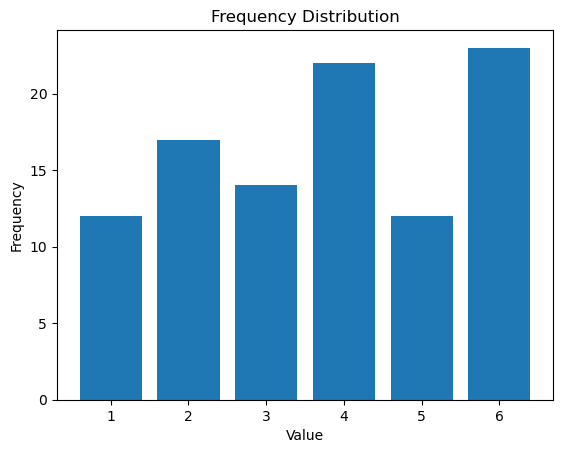

In [27]:
plt.bar(numbers_frequency.index, numbers_frequency.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

In [ ]:
# I dont really have input to give regarding this

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [30]:
roll_thousand = pd.read_csv('roll_the_dice_thousand.csv')
roll_thousand

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


In [31]:
numbers_frequency = roll_thousand["value"].value_counts()
frequency_numbers = {}

for value in numbers:
    if value in frequency_numbers:
        frequency_numbers[value] += 1
    else:
        frequency_numbers[value] = 1

numbers_frequency

1    175
3    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

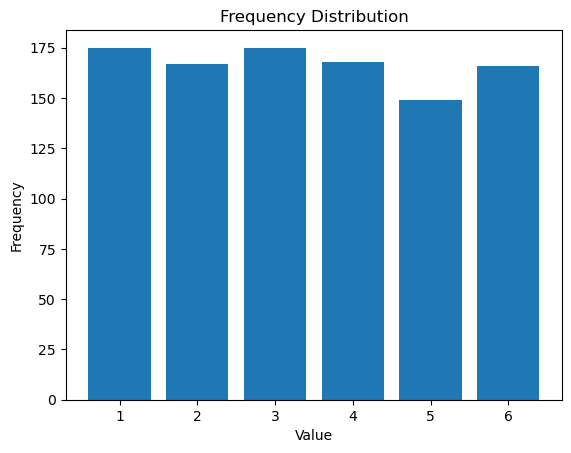

In [32]:
plt.bar(numbers_frequency.index, numbers_frequency.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

In [ ]:
# The values look more even, as we have an universe 10x bigger its expectable to get more even results

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [33]:
age_population = pd.read_csv('ages_population.csv')
age_population

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [34]:
numbers_frequency = age_population["observation"].value_counts()
frequency_numbers = {}

for value in numbers:
    if value in frequency_numbers:
        frequency_numbers[value] += 1
    else:
        frequency_numbers[value] = 1

numbers_frequency

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
73.0     1
82.0     1
70.0     1
71.0     1
69.0     1
Name: observation, Length: 72, dtype: int64

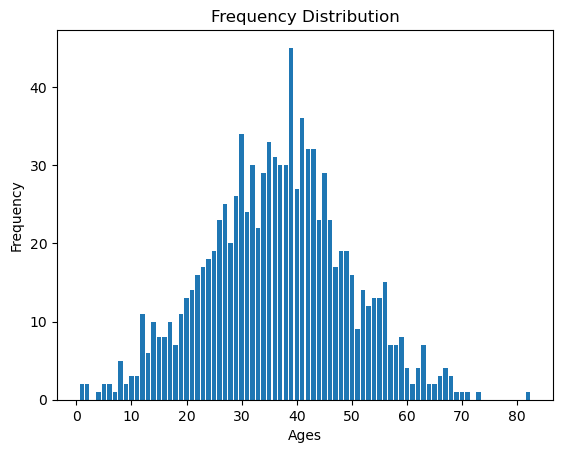

In [35]:
plt.bar(numbers_frequency.index, numbers_frequency.values)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [36]:
age_population["observation"].mean()

36.56

In [37]:
age_population["observation"].std()

12.816499625976762

In [ ]:
#I had the impression that the mean would be between 30 and 40 and that the std would be around 10 years

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [38]:
age_population2 = pd.read_csv('ages_population2.csv')
age_population2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [39]:
numbers_frequency = age_population2["observation"].value_counts()
frequency_numbers = {}

for value in numbers:
    if value in frequency_numbers:
        frequency_numbers[value] += 1
    else:
        frequency_numbers[value] = 1

numbers_frequency

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
19.0      3
35.0      3
36.0      2
Name: observation, dtype: int64

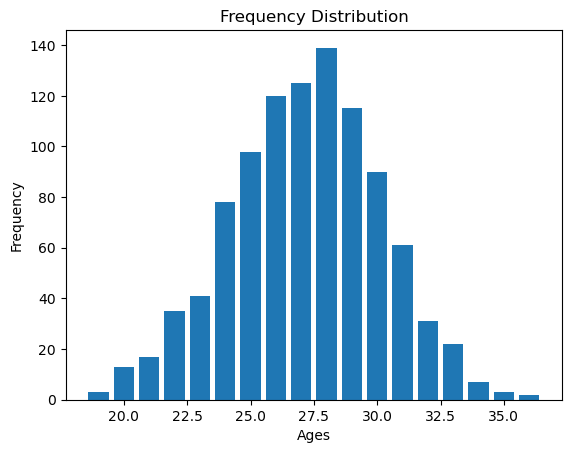

In [40]:
plt.bar(numbers_frequency.index, numbers_frequency.values)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
#the interval is smaller

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [41]:
age_population2["observation"].mean()

27.155

In [42]:
age_population2["observation"].std()

2.969813932689186

In [ ]:
#it makes sense. the interval is smaller so the std is smaller as well

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [43]:
age_population3 = pd.read_csv('ages_population3.csv.')
age_population3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [44]:
numbers_frequency = age_population3["observation"].value_counts()
frequency_numbers = {}

for value in numbers:
    if value in frequency_numbers:
        frequency_numbers[value] += 1
    else:
        frequency_numbers[value] = 1

numbers_frequency

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
8.0      1
9.0      1
1.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

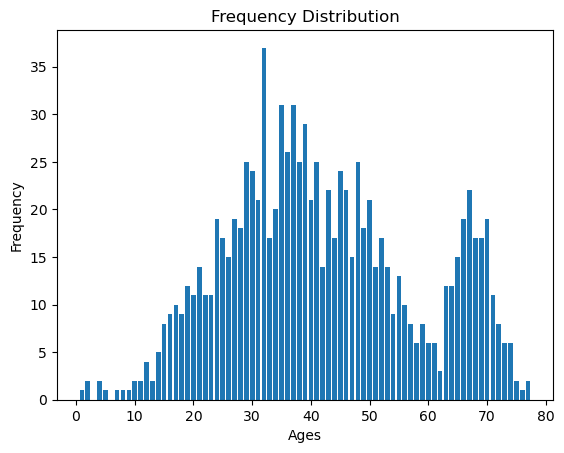

In [45]:
plt.bar(numbers_frequency.index, numbers_frequency.values)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [46]:
age_population3["observation"].mean()

41.989

In [47]:
age_population3["observation"].std()

16.144705959865934

In [ ]:
#std is bigger as the values are more distributed

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [48]:
q1 = np.quantile(age_population3,0.25)
print(f"the first quartile is {q1}")

q2 = np.quantile(age_population3,0.50)
print(f"the second quartile is {q2}")

q3 = np.quantile(age_population3,0.75)
print(f"the third quartile is {q3}")


the first quartile is 30.0
the second quartile is 40.0
the third quartile is 53.0


In [ ]:
#they are very close

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""